In [177]:
import pandas
import ctn_benchmark
import seaborn as sns

%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [178]:
data = ctn_benchmark.Data('data')
df = pandas.DataFrame(data.data)

In [179]:
# Run this code block in order to look at the variance in tuning curve width while keeping c and g = 100
# and changing the increment of the intercepts :D
df = df[df.curve_width.notnull()]

In [180]:
df

,__builtins__,_backend,_childhood,_dt,_gui,_hide_overlay,_left_intercept,_mod,_number_of_neurons,_right_intercept,_seed,_t_glasses_on,_time_per_val,_time_per_val_testing,_train_int,curve_width,neg_dist,pos_dist,shift
0,"{'next': <built-in function next>, 'staticmeth...",nengo,100,0.001,False,False,0.80,0.401426,200,1.00,0,100.0,0.5,0.5,45,35.0,17.0,18.0,2
4,"{'next': <built-in function next>, 'staticmeth...",nengo,100,0.001,False,False,0.80,0.401426,200,0.85,1,100.0,0.5,0.5,45,34.0,17.0,17.0,1
6,"{'next': <built-in function next>, 'staticmeth...",nengo,100,0.001,False,False,0.90,0.401426,200,0.95,0,100.0,0.5,0.5,45,32.0,16.0,16.0,0
8,"{'next': <built-in function next>, 'staticmeth...",nengo,100,0.001,False,False,0.80,0.401426,200,1.00,1,100.0,0.5,0.5,45,36.0,18.0,18.0,3
12,"{'next': <built-in function next>, 'staticmeth...",nengo,100,0.001,False,False,0.80,0.401426,200,0.80,1,100.0,0.5,0.5,45,34.0,17.0,17.0,4
14,"{'next': <built-in function next>, 'staticmeth...",nengo,100,0.001,False,False,0.90,0.401426,200,1.00,0,100.0,0.5,0.5,45,32.0,16.0,16.0,-2
15,"{'next': <built-in function next>, 'staticmeth...",nengo,100,0.001,False,False,0.70,0.401426,200,0.95,1,100.0,0.5,0.5,45,37.0,18.0,19.0,3
17,"{'next': <built-in function next>, 'staticmeth...",nengo,100,0.001,False,False,0.85,0.401426,200,0.85,0,100.0,0.5,0.5,45,33.0,16.0,17.0,1
18,"{'next': <built-in function next>, 'staticmeth...",nengo,100,0.001,False,False,0.90,0.401426,200,0.90,1,100.0,0.5,0.5,45,32.0,16.0,16.0,0
19,"{'next': <built-in function next>, 'staticmeth...",nengo,100,0.001,False,False,0.95,0.401426,200,1.00,0,100.0,0.5,0.5,45,26.0,13.0,13.0,1


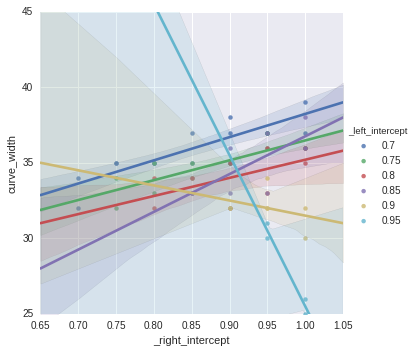

In [186]:
g = sns.lmplot('_right_intercept', 'curve_width', data = df, hue = '_left_intercept')

g.set(ylim=(25, 45))

In [187]:
df['rat'] = df['_left_intercept']/df['_right_intercept']

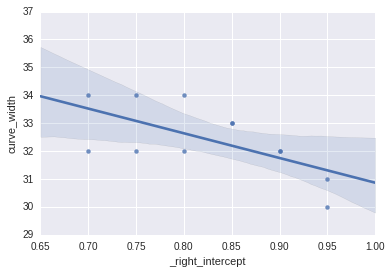

In [188]:
data = df.loc[df['rat'] == 1.0]
#print(data)
o = sns.regplot('_right_intercept', 'curve_width', data = df.loc[df['rat'] == 1.0])
#If intercepts are limited to the same number, avg curve width is always 33

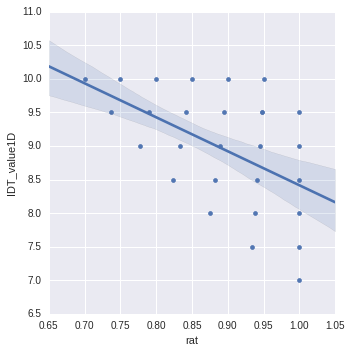

In [194]:
# If we want to know which approximate range of intercepts gives us the correct curve width, we compute 
# what their values would be in degrees and itd increments
# In their exposere graphs, the width of the owl's tuning curves were ~50 picoseconds in one direction
# which is 100 when overall width is considered. 

df['IDT_value1D'] = df['_right_intercept']*4*2.5
r = sns.lmplot('rat','IDT_value1D', data = df)